In [7]:
# Paqueterias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import trapz

In [8]:
# Constantes
h = 0.7 # H0/(100 km/s/Mpc)
Neff = 3.045
# Kelvin to eV
Kev = 1/(11604.5) # eV
# Temperatures today
# CMB photons
Tg0 = 2.726*Kev
# Neutrinos
Tnu0 = (4/11)**(1/3)*Tg0
# Variables
# Scale factor a
a_min = 1e-5
a_max = 1
a_arr = np.linspace(a_min,a_max,10000)
# a_arr = np.linspace(a_min,a_max,200000)
# Redshift
z_arr = 1/a_arr - 1

In [9]:
def Tnu(a):
    return Tnu0/a
def fermi_dirac(p,a, Mnu):
    return np.sqrt(p**2 + Mnu**2)*p**2/(1 + np.exp(p/Tnu(a)))

In [10]:
# # Define the limits of integration for the variable you want to integrate over
# # For example, integrate over x from 0 to 1
# x_lower_limit = 1e-16
# x_upper_limit = 1000

# integral_values = np.empty_like(a_arr)

# # Perform numerical integration for each y value
# for i, y in enumerate(a_arr):
#     integral_values[i] = np.trapz(fermi_dirac(np.linspace(x_lower_limit, x_upper_limit, 60000), y, 0.01), np.linspace(x_lower_limit, x_upper_limit, 60000))

# # Define the limits of integration for the variable you want to integrate over
# # For example, integrate over x from 0 to 1
# x_lower_limit = 1e-16
# x_upper_limit = 10

# integral_values2 = np.empty_like(a_arr)
# # Perform numerical integration for each y value
# for i, y in enumerate(a_arr):
#     integral_values2[i] = np.trapz(fermi_dirac(np.linspace(x_lower_limit, x_upper_limit, 60000), y, 0.01), np.linspace(x_lower_limit, x_upper_limit, 60000))

# rhonu = (1/np.pi**2)*integral_values/(1.325e-11)
# rhonu2 = (1/np.pi**2)*integral_values2/(1.325e-11)

# # Compute the time t0
# differences = np.abs(a_arr - 1e-3)
# # Find the index where the difference is minimum
# index = np.argmin(differences)
# # Value of t0
# a_change = a_arr[index]
# # join_index = np.abs(a_arr - a_change).argmin()

# # rhonu_001 = np.concatenate((rhonu[:join_index], rhonu2[join_index:]))
# rhonu_001 = np.concatenate((rhonu[:index], rhonu2[index:]))

In [11]:
def rhonu_m(Mnu):
    p_lower1 = 1e-16
    p_upper1 = 1000
    integral_values1 = np.empty_like(a_arr)
# Perform numerical integration for each y value
    for i, y in enumerate(a_arr):
        integral_values1[i] = np.trapz(fermi_dirac(np.linspace(p_lower1, p_upper1, 60000), y, Mnu), np.linspace(p_lower1, p_upper1, 60000))
# Second integral
    p_lower2 = 1e-16
    p_upper2 = 10
    integral_values2 = np.empty_like(a_arr)
    # Perform numerical integration for each y value
    for i, y in enumerate(a_arr):
        integral_values2[i] = np.trapz(fermi_dirac(np.linspace(p_lower2, p_upper2, 60000), y, Mnu), np.linspace(p_lower2, p_upper2, 60000))
# densities
    rhonu1 = (1/np.pi**2)*integral_values1
    rhonu2 = (1/np.pi**2)*integral_values2
# Find index chnage
    differences = np.abs(a_arr - 1e-3)
# Find the index where the difference is minimum
    index = np.argmin(differences)
    rhonu = np.concatenate((rhonu1[:index], rhonu2[index:]))

    if Mnu == 0:
        return rhonu, 0
    elif Mnu != 0:
        return rhonu, 3.15*Tnu0/Mnu
    # return rhonu

In [12]:
rhonu_0 = rhonu_m(0)[0]
rhonu_1, a_tr_1 = rhonu_m(1)
rhonu_01, a_tr_01 = rhonu_m(0.1)
rhonu_001, a_tr_001 = rhonu_m(0.01)

C:\Users\hugor\AppData\Local\Temp\ipykernel_18752\3101367592.py:4: RuntimeWarning: overflow encountered in exp
  return np.sqrt(p**2 + Mnu**2)*p**2/(1 + np.exp(p/Tnu(a)))


In [13]:
# # Densities plot
# plt.figure(figsize=(8, 6))
# plt.plot(a_arr,rhonu,label='Neutrinos', color = 'purple')
# plt.plot(a_arr,rhom(a_arr),label='Matter', color = 'b')
# plt.ylabel('Energy density: $\\rho_i/\\rho^0_{cr}$', fontsize=14)
# plt.xlabel('Scale factor: $a$', fontsize=14)
# plt.legend(loc='best', fontsize=12)
# plt.xlim([np.min(a_arr), 1])
# # plt.ylim([1e-6, 1])
# plt.xscale('log')
# plt.yscale('log')
# plt.title(f"Cosmic densities", fontsize=16)
# plt.grid()
# plt.show()

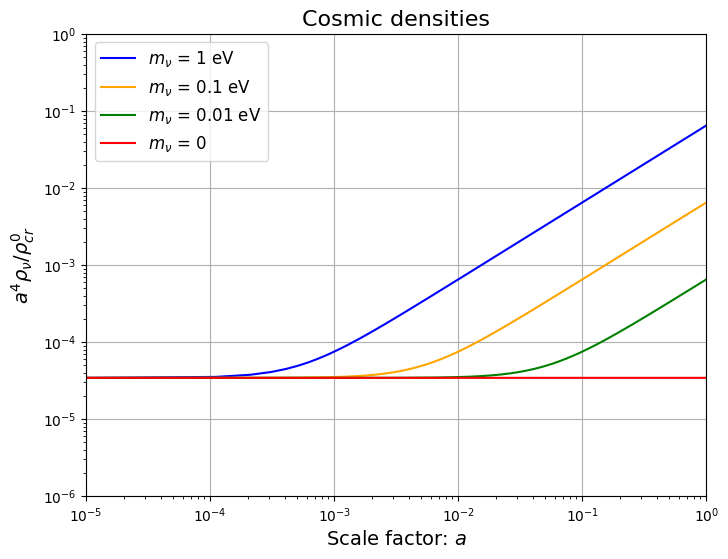

In [14]:
# Densities plot
plt.figure(figsize=(8, 6))
# plt.axvline(x=a_tr_01, color='red', linestyle='--')

plt.plot(a_arr,a_arr**4*rhonu_1/(1.325e-11),label=f'$m_\\nu$ = 1 eV', color = 'b')
plt.plot(a_arr,a_arr**4*rhonu_01/(1.325e-11),label=f'$m_\\nu$ = 0.1 eV', color = 'orange')
plt.plot(a_arr,a_arr**4*rhonu_001/(1.325e-11),label=f'$m_\\nu$ = 0.01 eV', color = 'g')
plt.plot(a_arr,a_arr**4*rhonu_0/(1.325e-11),label=f'$m_\\nu$ = 0', color = 'r')

plt.ylabel('$a^4\\rho_\\nu/\\rho^0_{cr}$', fontsize=14)
plt.xlabel('Scale factor: $a$', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.xlim([np.min(a_arr), 1])
plt.ylim([1e-6, 1])
plt.xscale('log')
plt.yscale('log')
plt.title(f"Cosmic densities", fontsize=16)
plt.grid()
plt.show()

In [15]:
Og0 = 2.469e-5/(h**2)

# Primordial (massless) neutrino
Onu0_0 = (7/8)*(4/11)**(4/3)*Neff*Og0
Onu0_1 = 3*1/(93.14*h**2)
Onu0_01 = 3*0.1/(93.14*h**2)
Onu0_001 = 3*0.01/(93.14*h**2)

Onu0 = Onu0_01
# Radiation
Or0 = Og0 + Onu0
# Baryons
Ob0 = 0.05
# CDM
Oc0 = 0.25
# Matter
Om0 = Ob0 + Oc0
# Curvature
Ok0 = 0
# Dark energy
Ol0 = 1 - Or0 - Om0 - Ok0

In [16]:
f_nu01 = rhonu_01/rhonu_01[0]
# Hubble parameter 1/(2997.92/h Mpc)
# General
def Hubble(a):
  return np.sqrt(Or0/(a**4) + Om0/(a**3) + Ol0 + Onu0*f_nu01)
# Especific
# CDM 
def Oc(a):
    return Oc0*(1/Hubble(a))**2*a**(-3)
# Baryons 
def Ob(a):
    return Ob0*(1/Hubble(a))**2*a**(-3)
# Photons 
def Og(a):
    return Og0*(1/Hubble(a))**2*a**(-4)
# Neutrinos (massless) 
def Onu(a):
    return Onu0*(1/Hubble(a))**2*f_nu01
# Dark energy
def Ol(a):
    return Ol0*(1/Hubble(a))**2

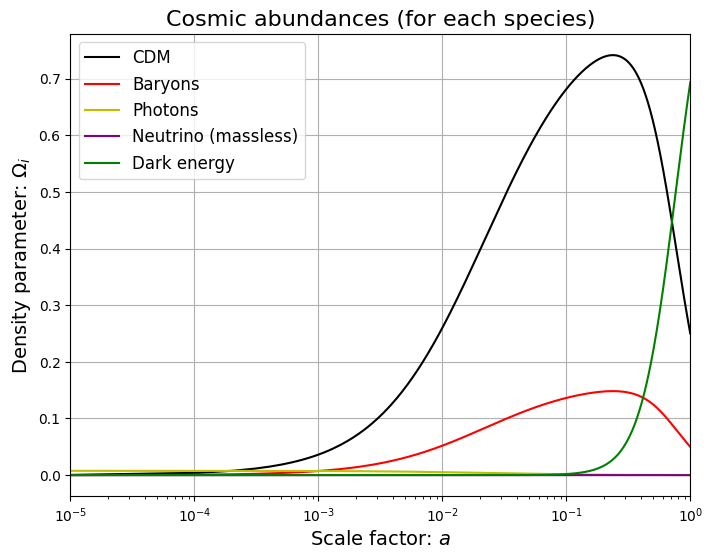

In [17]:
# Especific abundances plot
plt.figure(figsize=(8, 6))
plt.plot(a_arr,Oc(a_arr),label='CDM', color = 'black')
plt.plot(a_arr,Ob(a_arr),label='Baryons', color = 'red')
plt.plot(a_arr,Og(a_arr),label='Photons', color = 'y')
plt.plot(a_arr,Onu(a_arr),label='Neutrino (massless)', color = 'purple')
plt.plot(a_arr,Ol(a_arr),label='Dark energy', color = 'g')
plt.ylabel('Density parameter: $\\Omega_i$', fontsize=14)
plt.xlabel('Scale factor: $a$', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.xlim([np.min(a_arr), np.max(a_arr)])
plt.xscale('log')
plt.title(f"Cosmic abundances (for each species)", fontsize=16)
plt.grid()
plt.show()